In [1]:
import pandas as pd

PROJECTS_URL = "https://raw.githubusercontent.com/GokuMohandas/Made-With-ML/main/datasets/projects.csv"
projects = pd.read_csv(PROJECTS_URL)
projects.head(5)

,id,created_on,title,description
0,6,2020-02-20 06:43:18,Comparison between YOLO and RCNN on real world...,Bringing theory to experiment is cool. We can ...
1,7,2020-02-20 06:47:21,"Show, Infer & Tell: Contextual Inference for C...",The beauty of the work lies in the way it arch...
2,9,2020-02-24 16:24:45,Awesome Graph Classification,"A collection of important graph embedding, cla..."
3,15,2020-02-28 23:55:26,Awesome Monte Carlo Tree Search,A curated list of Monte Carlo tree search pape...
4,19,2020-03-03 13:54:31,Diffusion to Vector,Reference implementation of Diffusion2Vec (Com...


In [2]:
TAGS_URL = "https://raw.githubusercontent.com/GokuMohandas/Made-With-ML/main/datasets/tags.csv"
tags = pd.read_csv(TAGS_URL)
tags.head(5)

,id,tag
0,6,computer-vision
1,7,computer-vision
2,9,graph-learning
3,15,reinforcement-learning
4,19,graph-learning


In [3]:
merged_df=pd.merge(projects,tags,on='id')
merged_df.head(2)

,id,created_on,title,description,tag
0,6,2020-02-20 06:43:18,Comparison between YOLO and RCNN on real world...,Bringing theory to experiment is cool. We can ...,computer-vision
1,7,2020-02-20 06:47:21,"Show, Infer & Tell: Contextual Inference for C...",The beauty of the work lies in the way it arch...,computer-vision


In [4]:
merged_df.to_csv("labeled_projects.csv", index=False)

In [5]:
from collections import Counter
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from wordcloud import WordCloud, STOPWORDS
from ipywidgets import widgets
sns.set_theme()
warnings.filterwarnings('ignore')


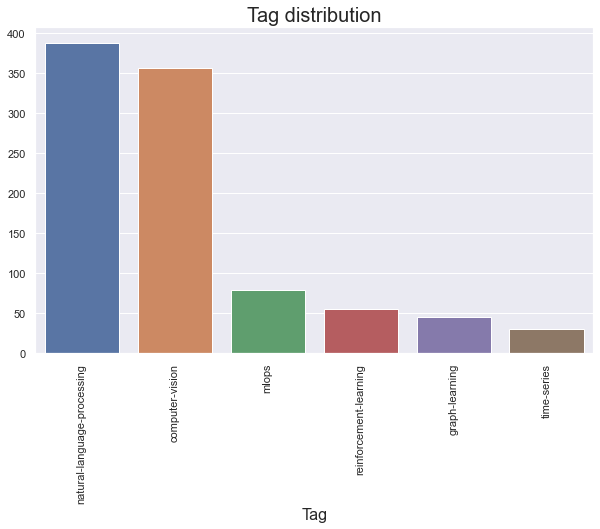

In [6]:
tags,tag_counts=merged_df.tag.value_counts().index,merged_df.tag.value_counts().values
plt.figure(figsize=(10,6))
ax=sns.barplot(tags,tag_counts)
plt.title("Tag distribution", fontsize=20)
plt.xlabel("Tag", fontsize=16)
ax.set_xticklabels(tags,rotation=90)
plt.show()

In [7]:
@widgets.interact(tags=tags)
def _wordcloud(tags="natural-language-processing"):
    plt.figure(figsize=(12,8))
    subset=merged_df[merged_df.tag==tags]
    _text=subset.title.values
    _cloud=WordCloud(stopwords=STOPWORDS,width=500,height=300,background_color='black').generate(" ".join(_text))
    plt.axis('off')
    plt.imshow(_cloud)

interactive(children=(Dropdown(description='tags', options=('natural-language-processing', 'computer-vision', …

In [8]:
#preprocess dataset
import nltk
import json
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
import re
from nltk.tokenize import word_tokenize

merged_df['text']=merged_df['title']+' '+merged_df['description']


In [9]:
nltk.download('stopwords')
STOPWORDS = stopwords.words("english")
stemmer = PorterStemmer()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\pnl0gp8t\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [10]:
def _clean_text(text,lower=True,stem=False,stopwords=STOPWORDS):
    if lower:
        text=text.lower()
    if len(stopwords):
        text=word_tokenize(text)
        text=[word for word in text if word not in STOPWORDS]
        text=" ".join(text)
    text=re.sub('^A-Za-z0-9',' ',text) # reomve alphanum
    text=re.sub(' +',' ',text) # remove repeated spaces
    text=text.strip() # strip
    
    text=re.sub("http\S+","",text)
    
    if stem:
        text=[stemmer.stem(word,to_lowercase=lower) for word in text.split(" ")]
    return text
    

In [11]:
# Toggle preprocessing parameters
@widgets.interact(lower=True, stem=False)
def display_cleaned_text(lower, stem):
    text = "Conditional image generation using Variational Autoencoders and GANs."
    cleaned_text = _clean_text(text=text, lower=lower, stem=stem)
    print (cleaned_text)  

interactive(children=(Checkbox(value=True, description='lower'), Checkbox(value=False, description='stem'), Ou…

In [12]:
from tqdm import tqdm
tqdm.pandas()
merged_df_=merged_df.copy()

merged_df['text']=merged_df['text'].progress_apply(_clean_text)


100%|██████████████████████████████████████████████████████████████████████████████| 955/955 [00:00<00:00, 1640.29it/s]


In [13]:
print (f"{merged_df_.text.values[0]}\n{merged_df.text.values[0]}")

Comparison between YOLO and RCNN on real world videos Bringing theory to experiment is cool. We can easily train models in colab and find the results in minutes.
comparison yolo rcnn real world videos bringing theory experiment cool . easily train models colab find results minutes .


In [14]:
ACCEPTED_TAGS = ["natural-language-processing", "computer-vision", "mlops", "graph-learning"]

In [15]:
na_tags = [item for item in merged_df.tag.unique() if item not in ACCEPTED_TAGS]
na_tags

['reinforcement-learning', 'time-series']

In [16]:
na_tags_df_index=merged_df[merged_df.tag.isin(na_tags)].index


In [17]:
#since we have imbalanced classes we tried to remove the low count labels and added new labels

merged_df.tag=merged_df.tag.apply(lambda x : 'other' if x in na_tags else x)
merged_df.iloc[na_tags_df_index].head()

,id,created_on,title,description,tag,text
3,15,2020-02-28 23:55:26,Awesome Monte Carlo Tree Search,A curated list of Monte Carlo tree search pape...,other,awesome monte carlo tree search curated list m...
37,121,2020-03-24 04:56:38,Deep Reinforcement Learning in TensorFlow2,deep-rl-tf2 is a repository that implements a ...,other,deep reinforcement learning tensorflow2 deep-r...
67,218,2020-04-06 11:29:57,Distributional RL using TensorFlow2,🐳 Implementation of various Distributional Rei...,other,distributional rl using tensorflow2 🐳 implemen...
74,239,2020-04-06 18:39:48,Prophet: Forecasting At Scale,Tool for producing high quality forecasts for ...,other,prophet : forecasting scale tool producing hig...
95,277,2020-04-07 00:30:33,Curriculum for Reinforcement Learning,Curriculum learning applied to reinforcement l...,other,curriculum reinforcement learning curriculum l...


In [18]:
min_freq = 75
tags = Counter(merged_df.tag.values)

In [19]:
# tags

In [20]:
@widgets.interact(min_freq=(0, tags.most_common()[0][1]))
def separate_tags_by_freq(min_freq=min_freq):
    tags_above_freq = Counter(tag for tag in tags.elements()
                                    if tags[tag] >= min_freq)
    tags_below_freq = Counter(tag for tag in tags.elements()
                                    if tags[tag] < min_freq)
    print ("Most popular tags:\n", tags_above_freq.most_common(3))
    print ("\nTags that just made the cut:\n", tags_above_freq.most_common()[-3:])
    print ("\nTags that just missed the cut:\n", tags_below_freq.most_common(3))

interactive(children=(IntSlider(value=75, description='min_freq', max=388), Output()), _dom_classes=('widget-i…

In [21]:
# Filter tags that have fewer than <min_freq> occurrences
tags_above_freq = Counter(tag for tag in tags.elements() 
                          if (tags[tag] >= min_freq))
merged_df.tag = merged_df.tag.apply(lambda tag: tag if tag in tags_above_freq else None)

In [22]:
# Fill None with `other`
merged_df.tag = merged_df.tag.fillna("other")

In [23]:
X=merged_df.text.to_numpy()
y=merged_df.tag

In [24]:
#encode the classes
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
encoded_y=encoder.fit_transform(y)


In [25]:
#split test and train data 
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

In [26]:
Vectorizor=TfidfVectorizer(stop_words=STOPWORDS,analyzer="char", ngram_range=(2,7))

In [27]:
X_train,X_test,y_train,y_test=train_test_split(X,y,stratify=y,random_state=42,test_size=0.2)
X_train=Vectorizor.fit_transform(X_train)
X_test=Vectorizor.transform(X_test)


In [28]:
from imblearn.over_sampling import RandomOverSampler
oversample=RandomOverSampler(sampling_strategy='all')

X_over, y_over = oversample.fit_resample(X_train, y_train)

In [29]:
import mlflow
from argparse import Namespace
from pathlib import Path



In [30]:
args=Namespace(
    lower=True,
    max_n_grams=7,
    analyer='all',
    stem=False,
    analyzer="char",
    alpha=1e-4,
    learning_rate=1e-1,
    power_t=0.1,
    num_epochs=100
    )

In [31]:
#tracking URI

model_registry=Path("experiments")
# Path(model_registry)
Path(model_registry).mkdir(exist_ok=True)
# mlflow.set_tracking_uri("file://" + str(model_registry.absolute()))

In [ ]:
# Path(model_registry)

In [32]:
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import log_loss, precision_recall_fscore_support

In [59]:
def train(args,merged_df,trial=None):
    #train model
    X=merged_df.text.to_numpy()
    y=merged_df.tag
    Vectorizor=TfidfVectorizer(stop_words=STOPWORDS,analyzer=args.analyzer, ngram_range=(2,args.max_n_grams))
    X_train,X_test,y_train,y_test=train_test_split(X,y,stratify=y,random_state=42,test_size=0.2)
    X_train=Vectorizor.fit_transform(X_train)
    X_test=Vectorizor.transform(X_test)
    oversample = RandomOverSampler(sampling_strategy="all")
    X_over, y_over = oversample.fit_resample(X_train, y_train)
    
    model=SGDClassifier(loss="log", penalty="l2", alpha=args.alpha, max_iter=1,
        learning_rate="constant", eta0=args.learning_rate, power_t=args.power_t, 
        warm_start=True)
    for epoch in range(args.num_epochs):
        model.fit(X_over,y_over)
        train_loss=log_loss(y_train,model.predict_proba(X_train))
        test_loss=log_loss(y_test,model.predict_proba(X_test))
        
        if not epoch % 10:
            print(
                f"Epoch: {epoch} | "
                f"train_loss: {train_loss}, "
                f"test_loss: {test_loss}"
            )
            
        if not trial:
            mlflow.log_metrics({"train_loss":train_loss,  "test_loss":test_loss},step=epoch)
        
    y_pred=model.predict(X_test)
    y_prob=model.predict_proba(X_test)
    metrics=precision_recall_fscore_support(y_test,y_pred,average='weighted')
    performance={'precision':metrics[0],'recall':metrics[1],'f1':metrics[2]}
    return {
        "args": args,
#         "label_encoder": encoder,
        "vectorizer": Vectorizor,
        "model": model,
        "performance": performance
    }

In [60]:
import joblib
import tempfile

In [61]:
# mlflow.set_experiment(experiment_name="baselines")

In [62]:
#set experiemnt to run mlflow 

mlflow.set_experiment(experiment_name='experiments')
def save_dict(d, filepath):
    with open(filepath, "w") as fp:
        json.dump(d, indent=2, sort_keys=False, fp=fp)

In [66]:
# Tracking
with mlflow.start_run(run_name="sgd"):

    # Train & evaluate
    artifacts = train(args=args, merged_df=merged_df)

    # Log key metrics
    mlflow.log_metrics({"precision": artifacts["performance"]["precision"]})
    mlflow.log_metrics({"recall": artifacts["performance"]["recall"]})
    mlflow.log_metrics({"f1": artifacts["performance"]["f1"]})

    # Log artifacts
    with tempfile.TemporaryDirectory() as dp:
#         artifacts["label_encoder"].save(Path(dp, "label_encoder.json"))
        joblib.dump(artifacts["vectorizer"], Path(dp, "vectorizer.pkl"))
        joblib.dump(artifacts["model"], Path(dp, "model.pkl"))
        save_dict(artifacts["performance"], Path(dp, "performance.json"))
        mlflow.log_artifacts(dp)

    # Log parameters
    mlflow.log_params(vars(artifacts["args"]))

Epoch: 0 | train_loss: 1.1530548915792707, test_loss: 1.1879036333685506
Epoch: 10 | train_loss: 0.4534501965062149, test_loss: 0.6239587357098102
Epoch: 20 | train_loss: 0.3124576358885351, test_loss: 0.532132109549516
Epoch: 30 | train_loss: 0.2512656257968717, test_loss: 0.4962548601034428
Epoch: 40 | train_loss: 0.21850858054848699, test_loss: 0.47803981237386295
Epoch: 50 | train_loss: 0.1989361836180015, test_loss: 0.4675856918940228
Epoch: 60 | train_loss: 0.18642704270487187, test_loss: 0.4612246807083997
Epoch: 70 | train_loss: 0.17801289724615404, test_loss: 0.4570473350092287
Epoch: 80 | train_loss: 0.1722006058878634, test_loss: 0.4542458233485846
Epoch: 90 | train_loss: 0.16817440587481894, test_loss: 0.45251327417129567


In [94]:
def load_dict(filepath):
    """Load a dict from a json file."""
    with open(filepath, "r") as fp:
        d = json.load(fp)
    return d

In [77]:
experiment_id = mlflow.get_experiment_by_name("experiments").experiment_id
all_runs = mlflow.search_runs(experiment_ids=experiment_id, order_by=["metrics.val_loss ASC"])
# print (all_runs)

In [88]:
best_run_id = all_runs.iloc[0].run_id
best_run = mlflow.get_run(run_id=best_run_id)

In [95]:
client = mlflow.tracking.MlflowClient()

In [96]:
with tempfile.TemporaryDirectory() as dp:
    client.download_artifacts(run_id=best_run_id, path="", dst_path=dp)
    vectorizer = joblib.load(Path(dp, "vectorizer.pkl"))
#     label_encoder = encoder.load(fp=Path(dp, "label_encoder.json"))
    model = joblib.load(Path(dp, "model.pkl"))
    performance = load_dict(filepath=Path(dp, "performance.json"))

In [97]:
print (json.dumps(performance, indent=2))

{
  "precision": 0.8792066929386265,
  "recall": 0.8743455497382199,
  "f1": 0.8724405546346196
}
